In [1]:
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
all_results = [file for file in glob("*.gzip")]
all_results

['deep_q_100_100_b_g_0.8.parquet.gzip',
 'deep_q_100_100_b_g_0.5.parquet.gzip',
 'deep_q_100_100_b_g_0.6000000000000001.parquet.gzip',
 'deep_q_100_100_b_g_1.3.parquet.gzip',
 'deep_q_100_100_b_g_0.1.parquet.gzip',
 'deep_q_100_100_b_g_1.1.parquet.gzip',
 'deep_q_100_100_4.parquet.gzip',
 'deep_q_100_100_b_g_0.30000000000000004.parquet.gzip',
 'deep_q_100_100_b_g_1.0.parquet.gzip',
 'deep_q_100_100.parquet.gzip',
 'deep_q_100_100_b.parquet.gzip',
 'deep_q_100_100_b_g_0.7000000000000001.parquet.gzip',
 'deep_q_10_10.parquet.gzip',
 'deep_q_100_100_b_g_1.2000000000000002.parquet.gzip',
 'deep_q_100_100_b_g_0.4.parquet.gzip',
 'deep_q_100_100_b_g_0.9.parquet.gzip',
 'deep_q_100_100_b_g_0.2.parquet.gzip',
 'results.parquet.gzip',
 'deep_q_100_100_b_g_{gamma}.parquet.gzip']

In [3]:
res = [pd.read_parquet(file) for file in all_results]

In [4]:
all_res = pd.concat(res)

In [5]:
all_res.head()

,iteration,total_reward,type,action_space_
0,1,-147.296663,100_deep_q_bellman_0.8,7
1,2,-119.533742,100_deep_q_bellman_0.8,7
2,3,-137.339610,100_deep_q_bellman_0.8,7
3,4,-117.595721,100_deep_q_bellman_0.8,7
4,5,-95.224494,100_deep_q_bellman_0.8,7


In [6]:
top = all_res.groupby('type')['total_reward'].mean().reset_index().sort_values('total_reward')
top.tail(5)['type']

8     100_deep_q_bellman_0.7000000000000001
11                   100_deep_q_bellman_1.0
7     100_deep_q_bellman_0.6000000000000001
10                   100_deep_q_bellman_0.9
3                    100_deep_q_bellman_0.2
Name: type, dtype: object

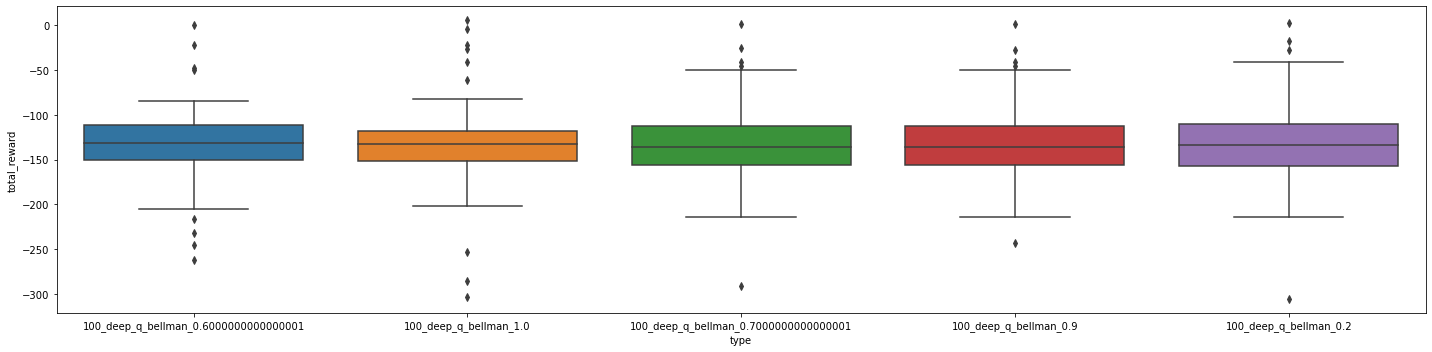

In [7]:
fig=plt.figure(figsize=(20,5))
ax = sns.boxplot(x="type", y="total_reward", data=all_res[all_res['type'].isin(top.tail(5)['type'])])
plt.tight_layout()
plt.show()